In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"

  # IPython 7.14 deprecated set_matplotlib_formats from IPython
  try:
    from matplotlib_inline.backend_inline import set_matplotlib_formats
  except ImportError:
    # Fall back to deprecated location for older IPython versions
    from IPython.display import set_matplotlib_formats
    
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L1VzZXJzL3JvYm90L1Byb2plY3RzL3BvcnRmb2xpby1idWlsZGVy'
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

{"/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/importlib/_bootstrap.py": 1764689462.0, "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/importlib/_bootstrap_external.py": 1764689462.0, "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/codecs.py": 1764689446.0, "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/encodings/aliases.py": 1764689466.0, "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/encodings/cp437.py": 1764689466.0, "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/encodings/__init__.py": 1764689466.0, "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/encodings/utf_8.py": 1764689467.0, "/Library/Developer/CommandLineT

In [2]:
import pandas as pd
import numpy as np
from portfolio_calculator import load_strategy_data

# Load strategy data
data = load_strategy_data("strategy-returns.xlsx")
strategies = data['strategies']

# Display strategy overview
strategy_df = pd.DataFrame([
    {
        'Strategy': s['name'],
        'Total Equity': f"${s['total_equity']:,.0f}",
        'Margin Factor': f"{s['margin_equity']:.1%}",
        'Max Drawdown': f"{s['max_drawdown']:.2%}",
        'Sharpe Ratio': f"{s['sharpe_ratio']:.2f}",
        'CAGR': f"{s['average_year']:.2%}"
    }
    for s in strategies
])

print(strategy_df.to_markdown(index=False))

| Strategy       | Total Equity   | Margin Factor   | Max Drawdown   |   Sharpe Ratio | CAGR   |
|:---------------|:---------------|:----------------|:---------------|---------------:|:-------|
| DELTA S&P      | $100,000       | 25.0%           | -15.43%        |           1.97 | 28.41% |
| GAMMA S&P      | $100,000       | 25.0%           | -5.72%         |           1.86 | 15.30% |
| VEGA S&P       | $100,000       | 35.0%           | -6.02%         |           1.78 | 16.47% |
| WAVE1          | $200,000       | 50.0%           | -5.84%         |           3.27 | 28.42% |
| WAVE2          | $200,000       | 50.0%           | -6.01%         |           2.24 | 17.91% |
| BS ATLAS       | $100,000       | 20.0%           | -8.44%         |           1.75 | 16.30% |
| BS AURORA      | $100,000       | 20.0%           | -6.49%         |           1.96 | 19.17% |
| BS GEMINI      | $100,000       | 20.0%           | -8.47%         |           1.79 | 17.82% |
| VECTOR APEX ES | $350,000   

In [3]:
from portfolio_calculator import calculate_portfolio_metrics

# Load data
data = load_strategy_data("strategy-returns.xlsx")
all_strategies = data['strategies']
monthly_returns = data['monthly_returns']

# Filter by risk
risk_appetite = 0.10  # 10% max drawdown
eligible_strategies = [s for s in all_strategies if abs(s['max_drawdown']) <= risk_appetite]

print(f"\n**Eligible Strategies:** {len(eligible_strategies)}")
for s in eligible_strategies:
    print(f"  - {s['name']} (Drawdown: {s['max_drawdown']:.2%})")

# Example allocation: 1 unit each of lowest drawdown strategies
unit_selections = {}
for s in sorted(eligible_strategies, key=lambda x: abs(x['max_drawdown']))[:3]:
    unit_selections[s['name']] = 1

print(f"\n**Selected Units:**")
for name, units in unit_selections.items():
    print(f"  - {name}: {units} unit(s)")

# Calculate portfolio metrics
portfolio = calculate_portfolio_metrics(
    unit_selections,
    all_strategies,
    monthly_returns,
    max_leverage=200
)

print(f"\n**Portfolio Metrics:**")
print(f"  - Total Allocation: ${portfolio['total_equity']:,.0f}")
print(f"  - Required Equity: ${portfolio['required_equity']:,.0f}")
print(f"  - Effective Leverage: {portfolio['required_equity']/portfolio['total_equity']:.1%}")
print(f"  - Max Drawdown: {portfolio['max_drawdown']:.2%}")
print(f"  - Average Annual Return: {portfolio['average_year']:.2%}")
print(f"  - Sharpe Ratio: {portfolio['sharpe_ratio']:.2f}")
print(f"  - Calmar Ratio: {portfolio['calmar_ratio']:.2f}")


**Eligible Strategies:** 7
  - GAMMA S&P (Drawdown: -5.72%)
  - VEGA S&P (Drawdown: -6.02%)
  - WAVE1 (Drawdown: -5.84%)
  - WAVE2 (Drawdown: -6.01%)
  - BS ATLAS (Drawdown: -8.44%)
  - BS AURORA (Drawdown: -6.49%)
  - BS GEMINI (Drawdown: -8.47%)

**Selected Units:**
  - GAMMA S&P: 1 unit(s)
  - WAVE1: 1 unit(s)
  - WAVE2: 1 unit(s)

**Portfolio Metrics:**
  - Total Allocation: $500,000
  - Required Equity: $225,000
  - Effective Leverage: 45.0%
  - Max Drawdown: -1.70%
  - Average Annual Return: 21.59%
  - Sharpe Ratio: 2.58
  - Calmar Ratio: 3.67


In [4]:
# Filter for <20% drawdown
risk_appetite = 0.20
eligible_strategies = [s for s in all_strategies if abs(s['max_drawdown']) <= risk_appetite]

print(f"\n**Eligible Strategies:** {len(eligible_strategies)}")
for s in eligible_strategies[:5]:
    print(f"  - {s['name']} (Drawdown: {s['max_drawdown']:.2%})")

# Diversified allocation - select from eligible strategies
selected_strategies = sorted(eligible_strategies, key=lambda x: abs(x['max_drawdown']))[:3]
unit_selections = {}
for i, s in enumerate(selected_strategies):
    unit_selections[s['name']] = 2 if i == 0 else 1

print(f"\n**Selected Units:**")
for name, units in unit_selections.items():
    print(f"  - {name}: {units} unit(s)")

# Calculate metrics
portfolio = calculate_portfolio_metrics(
    unit_selections,
    all_strategies,
    monthly_returns,
    max_leverage=200
)

print(f"\n**Portfolio Metrics:**")
print(f"  - Total Allocation: ${portfolio['total_equity']:,.0f}")
print(f"  - Required Equity: ${portfolio['required_equity']:,.0f}")
print(f"  - Effective Leverage: {portfolio['required_equity']/portfolio['total_equity']:.1%}")
print(f"  - Total Trades: {portfolio['total_trades']:.0f}")
print(f"  - Win Rate: {portfolio['winning_trades']/portfolio['total_trades']:.1%}")
print(f"  - Max Drawdown: {portfolio['max_drawdown']:.2%}")
print(f"  - Average Annual Return: {portfolio['average_year']:.2%}")
print(f"  - Sharpe Ratio: {portfolio['sharpe_ratio']:.2f}")


**Eligible Strategies:** 9
  - DELTA S&P (Drawdown: -15.43%)
  - GAMMA S&P (Drawdown: -5.72%)
  - VEGA S&P (Drawdown: -6.02%)
  - WAVE1 (Drawdown: -5.84%)
  - WAVE2 (Drawdown: -6.01%)

**Selected Units:**
  - GAMMA S&P: 2 unit(s)
  - WAVE1: 1 unit(s)
  - WAVE2: 1 unit(s)

**Portfolio Metrics:**
  - Total Allocation: $600,000
  - Required Equity: $250,000
  - Effective Leverage: 41.7%
  - Total Trades: 2736
  - Win Rate: 42.5%
  - Max Drawdown: -1.62%
  - Average Annual Return: 20.54%
  - Sharpe Ratio: 2.46


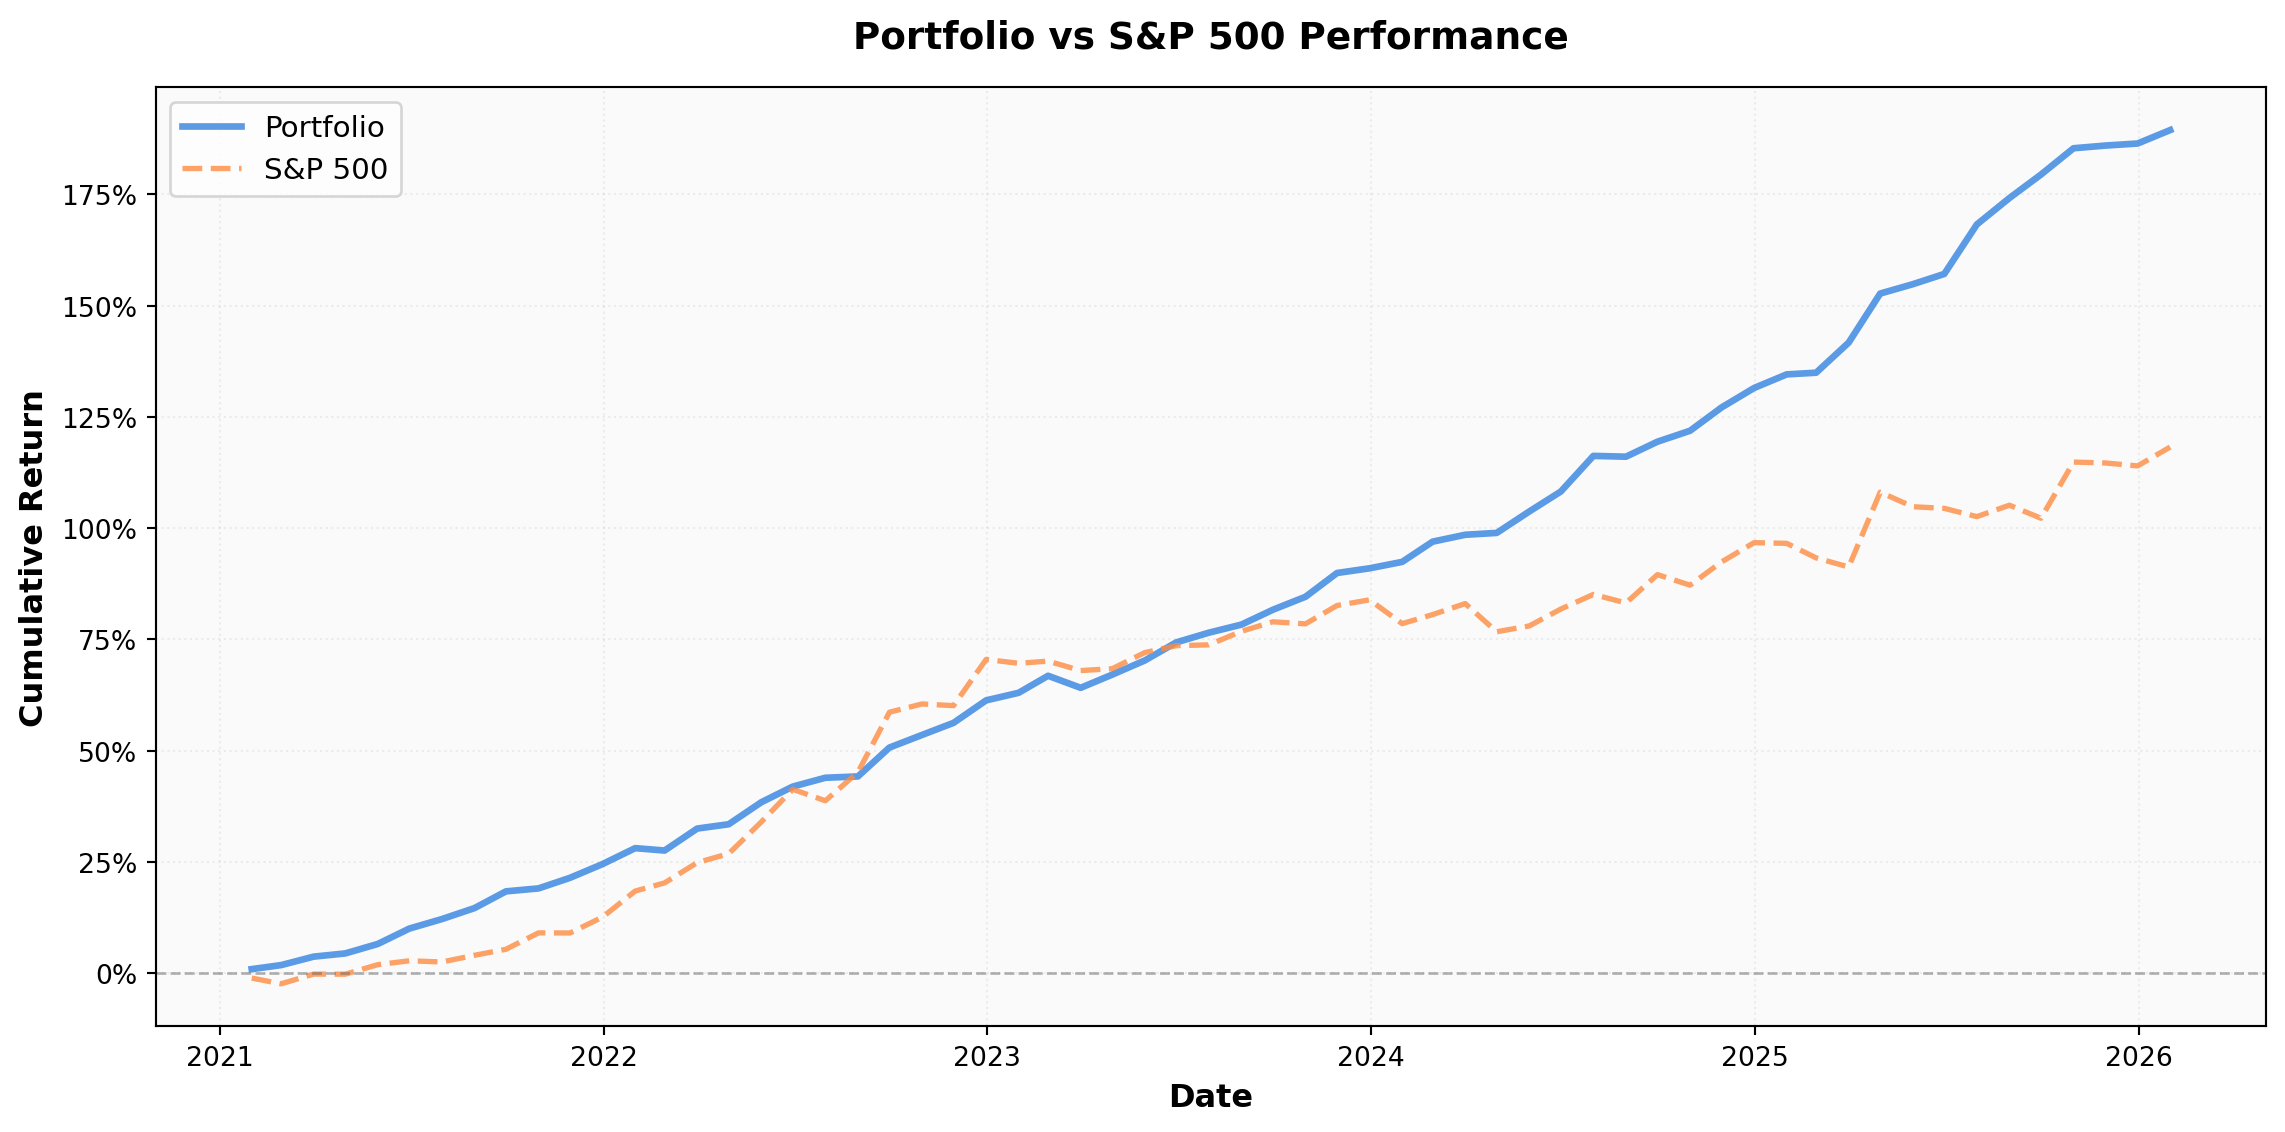

In [5]:
#| label: fig-cumulative-returns
#| fig-cap: Portfolio Cumulative Returns vs S&P 500

import matplotlib.pyplot as plt
from portfolio_calculator import calculate_weighted_returns

# Calculate portfolio monthly returns
portfolio_monthly_returns = calculate_weighted_returns(
    unit_selections,
    all_strategies,
    monthly_returns,
    portfolio['total_equity']
)

# Get dates
dates = pd.to_datetime(monthly_returns['DATE'])

# Calculate cumulative returns
cumulative_portfolio = [0]
for ret in portfolio_monthly_returns:
    cumulative_portfolio.append((1 + cumulative_portfolio[-1]) * (1 + ret) - 1)
cumulative_portfolio = cumulative_portfolio[1:]

# S&P 500 cumulative returns
sp500_column = [col for col in monthly_returns.columns if 'S&P' in str(col) and 'DELTA' not in str(col)][0]
sp500_returns = monthly_returns[sp500_column].fillna(0).tolist()
cumulative_sp500 = [0]
for ret in sp500_returns:
    cumulative_sp500.append((1 + cumulative_sp500[-1]) * (1 + ret) - 1)
cumulative_sp500 = cumulative_sp500[1:]

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(dates, cumulative_portfolio, linewidth=2.5, color='#4a90e2', label='Portfolio', alpha=0.9)
ax.plot(dates, cumulative_sp500, linewidth=2, color='#ff8c42', linestyle='--', label='S&P 500', alpha=0.8)
ax.axhline(0, color='#666666', linestyle='--', linewidth=1, alpha=0.5)

ax.set_xlabel('Date', fontsize=12, fontweight='bold')
ax.set_ylabel('Cumulative Return', fontsize=12, fontweight='bold')
ax.set_title('Portfolio vs S&P 500 Performance', fontsize=14, fontweight='bold', pad=15)
ax.grid(True, alpha=0.2, linestyle=':')
ax.legend(loc='upper left', fontsize=11)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))
ax.set_facecolor('#fafafa')

plt.tight_layout()
plt.show()

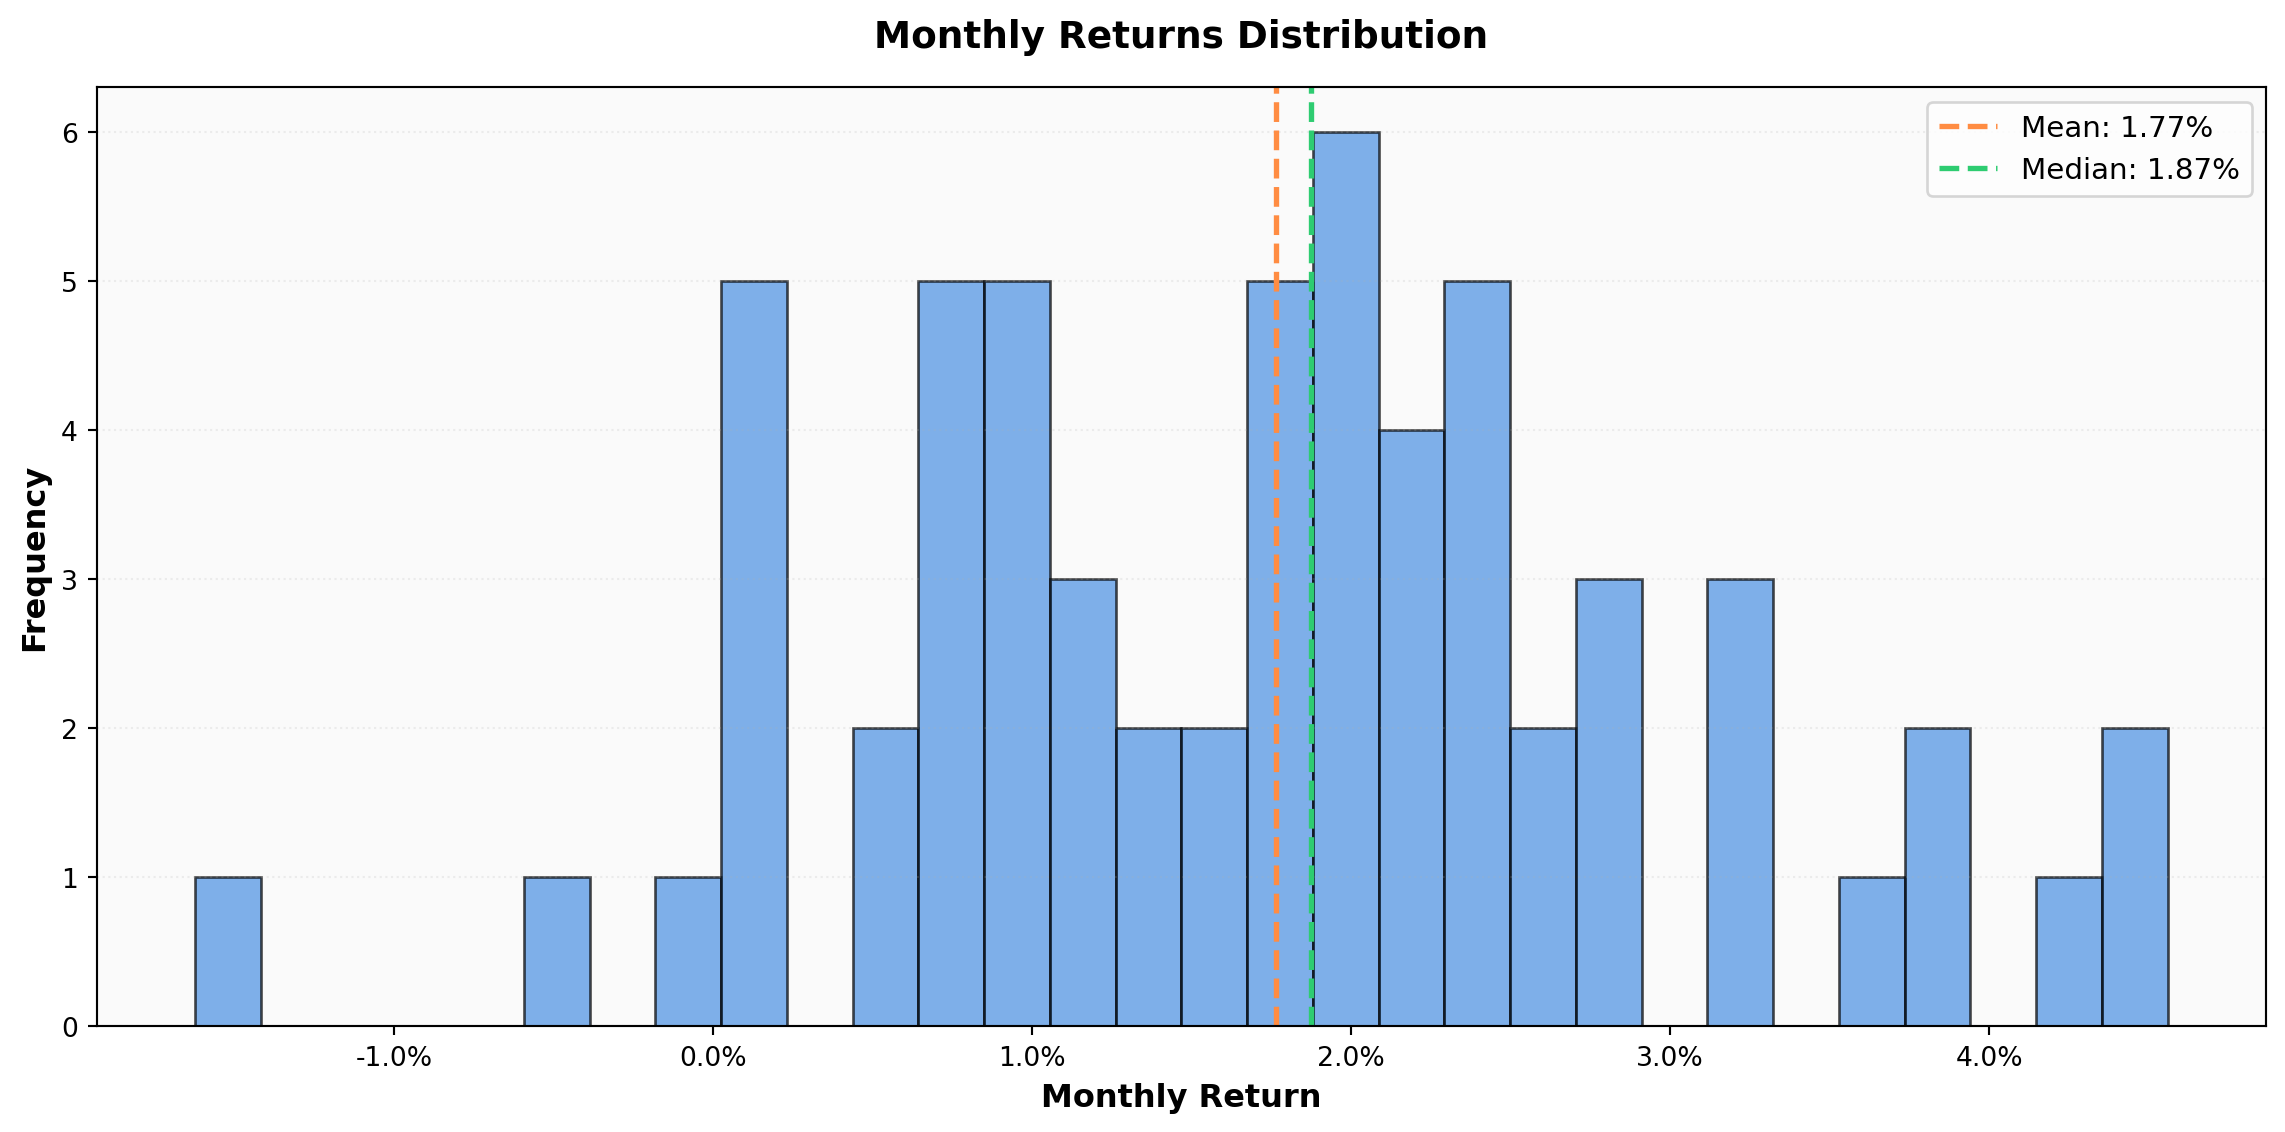

In [6]:
#| label: fig-monthly-distribution
#| fig-cap: Monthly Returns Distribution

fig, ax = plt.subplots(figsize=(12, 6))

# Create histogram
ax.hist(portfolio_monthly_returns, bins=30, color='#4a90e2', alpha=0.7, edgecolor='black')
ax.axvline(np.mean(portfolio_monthly_returns), color='#ff8c42', linestyle='--', linewidth=2, label=f'Mean: {np.mean(portfolio_monthly_returns):.2%}')
ax.axvline(np.median(portfolio_monthly_returns), color='#2ecc71', linestyle='--', linewidth=2, label=f'Median: {np.median(portfolio_monthly_returns):.2%}')

ax.set_xlabel('Monthly Return', fontsize=12, fontweight='bold')
ax.set_ylabel('Frequency', fontsize=12, fontweight='bold')
ax.set_title('Monthly Returns Distribution', fontsize=14, fontweight='bold', pad=15)
ax.grid(True, alpha=0.2, linestyle=':', axis='y')
ax.legend(loc='upper right', fontsize=11)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.1%}'))
ax.set_facecolor('#fafafa')

plt.tight_layout()
plt.show()